## Investigate levels of HRDetect inputs for each of the BRCA mutation status'

** Supp Fig 3 - HRD inputs**

In [3]:
rm(list=ls())
setwd("~/Desktop/BRCA1_BRCA2_SVs_paper/")
sampleInfo<-read.table("Manuscript/Intermediate_data/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)
rownames(sampleInfo)<-sampleInfo[,1]

sampleInfo[sampleInfo$BRCAstatus=="None" & sampleInfo$BRCA1_pro_meth==1,"BRCAstatus"]<-"BRCA1 promoter methylation"
sampleInfo[sampleInfo$BRCAstatus=="BRCA1 promoter methylation","BRCAstatus_compound"]<-"BRCA1 promoter methylation"

In [4]:
library(ggplot2)
library(RColorBrewer)
library(ggpubr)

sampleInfo$Cohort<-substr(sampleInfo$Sample,1,2)
sampleInfo$HRDeficient<-ifelse(sampleInfo$HRDetect>0.7,1,0)

#dat<-sampleInfo
dat<-sampleInfo[sampleInfo$BRCA1_pro_meth!=1,]

In [24]:
#Make mutexclcategory
hrd_snv_only<-dat[(dat$BRCAstatus=="Germline SNV"|dat$BRCAstatus=="Somatic SNV") & dat$BRCAstatus_SV=='SV absent'  ,
   c("Sample","HRDetect")]
df_1<-data.frame(MutCat="SNV_only",hrd_snv_only,Col="SNV")

hrd_germSNV<-dat[(dat$BRCAstatus=="Germline SNV") & dat$BRCAstatus_SV=='SV absent'  ,
   c("Sample","HRDetect")]
df_2<-data.frame(MutCat="Germline SNV only",hrd_germSNV,Col="SNV")

hrd_somSNV<-dat[(dat$BRCAstatus=="Somatic SNV") & dat$BRCAstatus_SV=='SV absent'  ,
   c("Sample","HRDetect")]
df_3<-data.frame(MutCat="Somatic SNV only",hrd_somSNV,Col="SNV")

hrd_anydel<-dat[dat$BRCAstatus=="Deletion overlapping exon (LOF)"  ,
    c("Sample","HRDetect")]
df_4<-data.frame(MutCat="Any deletion only",hrd_anydel,Col="Deletion")

hrd_singledel<-dat[(dat$BRCAstatus_SV=="Single deletion" & dat$BRCAstatus=="Deletion overlapping exon (LOF)"),
                   c("Sample","HRDetect")]
df_5<-data.frame(MutCat="Single deletion",hrd_singledel,Col="Deletion")

hrd_doubledel<-dat[(dat$BRCAstatus_SV=="Double deletion" & dat$BRCAstatus=="Deletion overlapping exon (LOF)"),
                   c("Sample","HRDetect")]
df_6<-data.frame(MutCat="Double deletion",hrd_doubledel,Col="Deletion")

hrd_sameorboth<-dat[((dat$BRCAstatus_compound=="SNV + deletion (same gene)")|
                     (dat$BRCAstatus_compound=="SNV + deletions (both genes)"))
  , c("Sample","HRDetect")]
df_7<-data.frame(MutCat="Compound same or both",hrd_sameorboth,Col="SNV + deletion")

hrd_same<-dat[((dat$BRCAstatus_compound=="SNV + deletion (same gene)"))
  , c("Sample","HRDetect")]
df_8<-data.frame(MutCat="Compound same",hrd_same,Col="SNV + deletion")

hrd_both<-dat[((dat$BRCAstatus_compound=="SNV + deletions (both genes)"))
  , c("Sample","HRDetect")]
df_9<-data.frame(MutCat="Compound both",hrd_both,Col="SNV + deletion")


hrd_brca1inv<-dat[(dat$BRCA1status=="Inversion spanning gene (INV_SPAN)" & dat$BRCA2status=="None") ,
    c("Sample","HRDetect")]
df_11<-data.frame(MutCat="BRCA1 inversion",hrd_brca1inv,Col="Non-deletion SV")

hrd_brca2dups<-dat[(dat$BRCA2status=="Duplication spanning gene (COPY_GAIN)" & dat$BRCA1status=="None") ,
    c("Sample","HRDetect")]
df_12<-data.frame(MutCat="BRCA2 duplication",hrd_brca2dups,Col="Non-deletion SV")



hrd_methyl<-sampleInfo[sampleInfo$BRCAstatus == "BRCA1 promoter methylation",
                       c("Sample","HRDetect")]
df_13<-data.frame(MutCat="Promoter methylation",hrd_methyl,Col="Methylation")

hrd_df<-rbind(df_2,df_3,df_5,df_6,df_8,df_9,df_11,df_12,df_13)
colnames(hrd_df)<-c("MutCat","Sample","HRDetect","Col")


table(hrd_df$MutCat)



   Germline SNV only     Somatic SNV only      Single deletion 
                  15                   11                   21 
     Double deletion        Compound same        Compound both 
                   6                    9                    6 
     BRCA1 inversion    BRCA2 duplication Promoter methylation 
                   6                    6                    9 

In [25]:
hrd_df<-hrd_df[hrd_df$MutCat!="None",c("Sample","MutCat","Col")]

In [26]:
hrd_inputs<-read.table('Manuscript/Intermediate_data/HGSOC_HRDetect_results.txt',sep="\t",header=T)

In [27]:
hrd_inputs[1:4,]

,Sample,Signature.3,Signature.8,Re_sig3,Re_sig5,deletion_microhomology_proportion,hrd_mean,norm_Signature.3,norm_Signature.8,norm_Re_sig3,norm_Re_sig5,norm_deletion_microhomology_proportion,norm_hrd_mean,HRDetect
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AOCS_001,AOCS_001,3177.641,980.2522,71.1685,0.00000,0.5759369,22.66667,1.678821,0.7860426,1.8219696,-1.304788,2.6316660,1.2920901,0.99948982
AOCS_004,AOCS_004,2943.193,1160.4384,0.0000,69.26988,0.3365079,20.33333,1.657269,0.8390735,-0.7604104,1.562605,0.8006688,1.1536944,0.92542907
AOCS_005,AOCS_005,1295.028,668.6965,0.0000,0.00000,0.2011834,17.66667,1.426458,0.6658775,-0.7604104,-1.304788,-0.3854748,0.9756525,0.03693727
AOCS_034,AOCS_034,3681.784,490.6786,143.8672,44.63217,0.6290098,33.00000,1.720232,0.5686773,2.2424969,1.271486,2.9996925,1.7751474,0.99998986


In [28]:
hrd_res<-merge(hrd_df,hrd_inputs,by="Sample",all.x=T)
hrd_res<-hrd_res[,c("Sample","MutCat","Col","Signature.3","Signature.8","Re_sig3","Re_sig5","deletion_microhomology_proportion","hrd_mean")]
hrd_res[1,]

Sample,MutCat,Col,Signature.3,Signature.8,Re_sig3,Re_sig5,deletion_microhomology_proportion,hrd_mean
<chr>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AOCS_004,Single deletion,Deletion,2943.193,1160.438,0,69.26988,0.3365079,20.33333


In [40]:
library(reshape)
long.hrd<-melt(hrd_res,id.vars=c("Sample","MutCat","Col"))

In [41]:
long.hrd[1:3,]


Sample,MutCat,Col,variable,value
<chr>,<fct>,<fct>,<fct>,<dbl>
AOCS_004,Single deletion,Deletion,Signature.3,2943.193
AOCS_005,BRCA2 duplication,Non-deletion SV,Signature.3,1295.028
AOCS_034,Compound both,SNV + deletion,Signature.3,3681.784


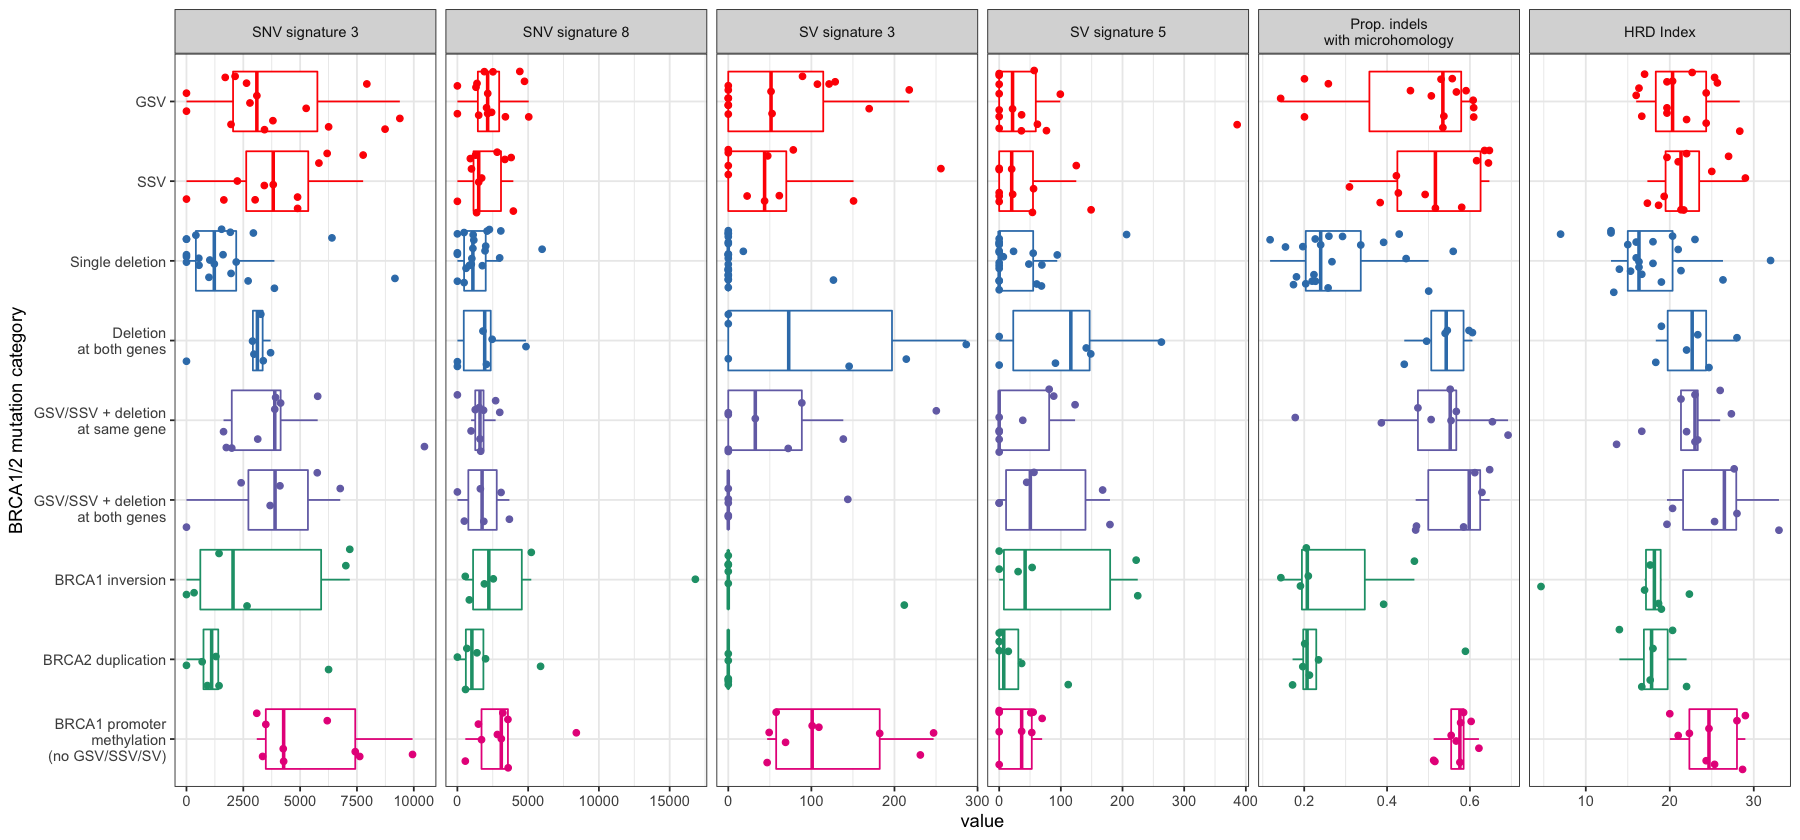

In [42]:
options(repr.plot.width=15)
long.hrd$MutCat<-factor(long.hrd$MutCat,levels=rev(levels(long.hrd$MutCat)))
inputs<-c(Signature.3="SNV signature 3",
          Signature.8="SNV signature 8",
          Re_sig3="SV signature 3",
          Re_sig5="SV signature 5",
          deletion_microhomology_proportion="Prop. indels\nwith microhomology",
          hrd_mean="HRD Index")

myColors <- c("red","#377EB8",brewer.pal(6,"Dark2")[3],brewer.pal(6,"Dark2")[1],brewer.pal(6,"Dark2")[4])
types<-c("SNV","Deletion","SNV + deletion","Non-deletion SV","Methylation")
labels <- c("GSV","SSV","Single deletion","\nDeletion\nat both genes\n",
           "\nGSV/SSV + deletion\nat same gene\n","\nGSV/SSV + deletion\nat both genes",
           "BRCA1 inversion","BRCA2 duplication","BRCA1 promoter\nmethylation\n (no GSV/SSV/SV)")

#png("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_figures/SuppFig3_box_hrdetectinput.png",
 #  width=15,height=6,res=300,unit="in")
    ggplot(long.hrd,aes(x=as.factor(MutCat),y=value,colour=Col))+facet_grid(.~variable,scales='free_x',labeller=labeller(variable = inputs))+
    geom_boxplot(outlier.shape=NA)+geom_jitter()+coord_flip()+theme_bw()+
    scale_x_discrete(labels=rev(labels))+
    scale_colour_manual(values=myColors,breaks=types)+
theme(legend.position="None")+xlab("BRCA1/2 mutation category")
#dev.off()